In [17]:
import glob 

import os, time
#import country_converter as coco

from osgeo import gdal
import pandas as pd 
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import rasterio as rs
from rasterio.merge import merge

from process_rasters_utils import *

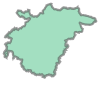

In [18]:
ashanti = gpd.read_file("/Users/ccsuehara/Documents/Ghana/data/ADM2_mat.shp")
ashanti = ashanti[ashanti['ADM1_NAME'] == "Ashanti"]
ashanti.set_crs('epsg:4326') 
ashanti = ashanti.dissolve(by = 'ADM1_NAME')
ashanti_bound = ashanti.geometry.iloc[0]
ashanti_bound.buffer(0)

In [20]:
## pluvial 
os.chdir("/Users/ccsuehara/GH_folders/ghana_access/data/Ghana/pluvial")
pluv = glob.glob("*.tif")
## fluvial
os.chdir("/Users/ccsuehara/GH_folders/ghana_access/data/Ghana/fluvial_undefended")
fluv = glob.glob("*.tif")

os.chdir("/Users/ccsuehara/GH_folders/ghana_access/scripts")


for each in pluv:
    out_arr, out_meta = crop_to_shp("../data/Ghana/pluvial/" + each, ashanti, "plu")
    export_raster_to_geotiff(out_arr, out_meta, "../data/floods/Ashanti/", each,"plu")

for each in fluv:
    out_arr, out_meta = crop_to_shp("../data/Ghana/fluvial_undefended/" + each, ashanti, "flu")
    export_raster_to_geotiff(out_arr, out_meta, "../data/floods/Ashanti/", each,"plu")

path = "../data/floods/Ashanti/"

dic_files = {'ev_5': glob.glob(path + "*_1in5.tif"),
             'ev_10': glob.glob(path + "*_1in10.tif"),
            'ev_20': glob.glob(path + "*_1in20.tif"),
            'ev_50': glob.glob(path + "*_1in50.tif"),
            'ev_75': glob.glob(path + "*_1in75.tif"),
            'ev_100': glob.glob(path + "*_1in100.tif"),
            'ev_200': glob.glob(path + "*_1in200.tif"),
            'ev_250': glob.glob(path + "*_1in250.tif"),
            'ev_500': glob.glob(path + "*_1in500.tif"),
            'ev_1000': glob.glob(path + "*_1in1000.tif")}


In [21]:
dic_files['ev_5']

['../data/floods/Ashanti/P_1in5.tif', '../data/floods/Ashanti/FU_1in5.tif']

In [22]:
for key, val in dic_files.items():
    out_lst = open_files_in_list(val)
    floodArray, out_trans = merge(out_lst, method='max')
    out_meta = out_lst[0].meta.copy()
    out_meta.update({"height": floodArray.shape[1], 
                            "width": floodArray.shape[2],
                            "transform": out_trans})
    with rs.open("../data/floods/Ashanti/merged/" + key + ".tif", 'w', **out_meta, compress = 'LZW', tiled=True) as dest:
          dest.write(floodArray)

In [23]:
5

5